In [4]:
import os

In [5]:
import glob

In [6]:
import btrack

In [7]:
from skimage.io import imread, imshow

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [2]:
from tqdm.auto import tqdm

In [10]:
def image_generator(files, crop = None):
    """
    Generator function for iterative procesessing of image files
    """
    
    if crop is None:
        for filename in tqdm(files):
            img = imread(filename)
            yield img
    else:
        for filename in tqdm(files):
            img = imread(filename)
            img = crop_image(img, crop)
            yield img

In [ ]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# Counting cells

Go in each position directory, load masks, count cells, plot

In [4]:
root_dir = '/home/nathan/data/kraken/ras'

In [5]:
## all competitive 90:10, 99:1 wt ras expts

expts_9010 = {'ND0010':[10, 11],
         'ND0011':[6, 7], 
         'ND0012':[3, 4, 6, 7, 8, 9, 10],
         'ND0013':[3, 4, 5, 6, 7, 8, 9, 10]
        }
expts_9901 = {'ND0010':[6, 7],
         'ND0011':[], 
         'ND0012':[5],
         'ND0013':[]
        }

expts_control_9010 = {'ND0010':[8, 9],
         'ND0011':[4, 5], 
         'ND0012':[1 ,2],
         'ND0013':[2]
        }
expts_control_9901 = {'ND0010':[4, 5],
         'ND0011':[], 
         'ND0012':[],
         'ND0013':[]
        }



In [6]:
expts_9010

{'ND0010': [10, 11],
 'ND0011': [6, 7],
 'ND0012': [3, 4, 6, 7, 8, 9, 10],
 'ND0013': [3, 4, 5, 6, 7, 8, 9, 10]}

#### check masks first

In [7]:
import napari
napari.__version__

'0.4.11'

In [8]:
from octopuslite import DaskOctopusLiteLoader

#### check single expt pos masks

In [9]:
experiment_dir = f'{root_dir}/ND0010/Pos5/Pos5_images'

In [10]:
images = DaskOctopusLiteLoader(experiment_dir)

In [ ]:
viewer = napari.Viewer()
viewer.add_image(images['irfp'], blending='additive', contrast_limits=[0,255])
viewer.add_image(images['mask'], blending= 'additive', contrast_limits=[0,2])

##### iterate through many positions checking images

In [ ]:
expt_type = expts_control_9010 # expts_9910
for expt in expt_type: #['ND0010']:#
    for pos in expt_type[expt]:#[10, 11]:#
        experiment_dir = f'{root_dir}/{expt}/Pos{pos}/Pos{pos}_images'
        images = DaskOctopusLiteLoader(experiment_dir, crop = (1200, 1600))
        print(experiment_dir)
        viewer = napari.Viewer()
        viewer.add_image(images['irfp'], blending='additive', contrast_limits=[10,110], colormap = 'green')
        viewer.add_image(images['rfp'], blending='additive', contrast_limits=[0,50], colormap = 'red')
        viewer.add_image(images['mask'], blending= 'additive', contrast_limits=[0,2], colormap = 'inferno', opacity = 0.5)
        viewer.show(block=True)

# Counting cells - filtering for expts currently segmented well

object files? or images

In [22]:
expts_9010_filt = {'ND0010':[10, 11],
         'ND0011':[6, 7], 
         #'ND0012':[3, 4, 6, 7, 8, 9, 10],
         #'ND0013':[3, 4, 5, 6, 7, 8, 9, 10]
        }
expts_9901_filt = {'ND0010':[6, 7],
        # 'ND0011':[], 
         #'ND0012':[5],
         #'ND0013':[]
        }

expts_control_9010_filt = {'ND0010':[8, 9],
         'ND0011':[4, 5], 
        # 'ND0012':[1 ,2],
         #'ND0013':[2]
        }
expts_control_9901_filt = {'ND0010':[4, 5],
       #  'ND0011':[], 
        # 'ND0012':[],
        # 'ND0013':[]
        }

In [11]:
expt_type = expts_9010

In [12]:
for expt in expt_type: #['ND0010']:#
    for pos in expt_type[expt]:#[10, 11]:#
        obj_path = f'{root_dir}/{expt}/Pos{pos}/*object*'
        if glob.glob(obj_path):
            print(obj_path, 'exists')

/home/nathan/data/kraken/ras/ND0010/Pos10/*object* exists
/home/nathan/data/kraken/ras/ND0010/Pos11/*object* exists
/home/nathan/data/kraken/ras/ND0011/Pos6/*object* exists
/home/nathan/data/kraken/ras/ND0011/Pos7/*object* exists


In [41]:
objects = {}
for expt in expt_type: #['ND0010']:#
    for pos in expt_type[expt]:#[10, 11]:#
        obj_path = f'{root_dir}/{expt}/Pos{pos}/*object*'
        if glob.glob(obj_path):
            print(glob.glob(obj_path))
            with btrack.dataio.HDF5FileHandler(
                 glob.glob(obj_path)[0], 'r', obj_type='obj_type_2',
            ) as hdf:
                objs = hdf.objects
        objects[f'{expt}/{pos}'] = objs

[INFO][2022/02/03 06:36:05 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos10/objects.h5...
[INFO][2022/02/03 06:36:05 pm] Loading objects/obj_type_2 (1191, 5) (1191 filtered: None)
[INFO][2022/02/03 06:36:05 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos10/objects.h5
[INFO][2022/02/03 06:36:05 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects.h5...


['/home/nathan/data/kraken/ras/ND0010/Pos10/objects.h5']
['/home/nathan/data/kraken/ras/ND0010/Pos11/objects.h5']


[INFO][2022/02/03 06:36:05 pm] Loading objects/obj_type_2 (1189, 5) (1189 filtered: None)
[INFO][2022/02/03 06:36:05 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects.h5


# checking out nd10pos11

In [52]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_2.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_1.h5', 'r', obj_type='obj_type_1',
) as hdf:
    gfp_objs = hdf.objects

[INFO][2022/02/03 07:23:04 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_2.h5...
[INFO][2022/02/03 07:23:04 pm] Loading objects/obj_type_2 (1189, 5) (1189 filtered: None)
[INFO][2022/02/03 07:23:04 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_2.h5
[INFO][2022/02/03 07:23:04 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_1.h5...
[INFO][2022/02/03 07:23:04 pm] Loading objects/obj_type_1 (1351, 5) (1351 filtered: None)
[INFO][2022/02/03 07:23:04 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_1.h5


In [53]:
len(gfp_objs)

1351

In [54]:
len(rfp_objs)

1189

# checking out nd10pos5 (99:1)

In [55]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_2.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_1.h5', 'r', obj_type='obj_type_1',
) as hdf:
    gfp_objs = hdf.objects

[INFO][2022/02/03 07:26:22 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_2.h5...
[INFO][2022/02/03 07:26:22 pm] Loading objects/obj_type_2 (1188, 5) (1188 filtered: None)
[INFO][2022/02/03 07:26:22 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_2.h5
[INFO][2022/02/03 07:26:22 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_1.h5...
[INFO][2022/02/03 07:26:23 pm] Loading objects/obj_type_1 (2391, 5) (2391 filtered: None)
[INFO][2022/02/03 07:26:23 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_1.h5


In [58]:
gfp_objs[0]

,ID,x,y,z,t,dummy,states,label,prob,area,max_intensity,prob_anaphase,prob_apoptosis,prob_interphase,prob_metaphase,prob_prometaphase
0,0,758.145508,574.839844,0.0,0,False,0,4,0.0,32600.0,1.0,0.000041,0.999946,6.299553e-08,0.000013,2.037653e-09


# count segments in each image

In [14]:
import matplotlib.pyplot as plt

In [10]:
import scipy.ndimage as nd

In [33]:
mask_files = sorted(glob.glob('/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/*channel099*'))

In [34]:
mask_files

['/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000000_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000001_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000002_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000003_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000004_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000005_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000006_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000007_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000008_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013

In [25]:
import pandas as pd

In [72]:
expts_9010

{'ND0010': [10, 11],
 'ND0011': [6, 7],
 'ND0012': [3, 4, 6, 7, 8, 9, 10],
 'ND0013': [3, 4, 5, 6, 7, 8, 9, 10]}

In [217]:
%%timeit
cell_count_9901 = {}
root_dir = '/home/nathan/data/kraken/ras'
for expt in (expts_9901):
    N = {'wt':[], 'ras': []}
    for pos in (expts_9901[expt]):
        print(expt, 'Pos', pos)
        N = {'wt':[], 'ras': []}
        mask_path = f'{root_dir}/{expt}/Pos{pos}/Pos{pos}_images/*channel099*'
        masks = sorted(glob.glob(mask_path))
        for i in image_generator(masks):
                count_gfp = nd.label(i == 1)[-1]
                count_rfp = nd.label(i == 2)[-1]
                N['wt'].append(count_gfp)
                N['ras'].append(coaunt_rfp)
        cell_count_9901[f'{expt}/Pos{pos}'] = N

ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
ND0010 Pos 6
ND0010 Pos 7
ND0012 Pos 5
8min 30s ± 1min 6s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# counting all masks

In [8]:
import pickle
from tqdm.auto import tqdm

In [20]:
%%timeit
cell_count = {}
root_dir = '/home/nathan/data/kraken/ras'
for expt in tqdm(range(10,14)):
    expt = f'ND00{expt}'
    pos_list = [pos for pos in os.listdir(f'{root_dir}/{expt}') 
                   if 'Pos' in pos 
                   and os.path.isdir(f'{root_dir}/{expt}/{pos}')]  
    
    for pos in tqdm(pos_list):
        print(expt, 'Pos', pos)
        N = {'wt':[], 'ras': []}
        mask_path = f'{root_dir}/{expt}/{pos}/{pos}_images/*channel099*'
        masks = sorted(glob.glob(mask_path))
        for i in image_generator(masks):
                count_gfp = nd.label(i == 1)[-1]
                count_rfp = nd.label(i == 2)[-1]
                N['wt'].append(count_gfp)
                N['ras'].append(count_rfp)
        cell_count[f'{expt}/Pos{pos}'] = N
        a_file = open(f"/home/nathan/data/results/ras/cell_count_{expt}_{pos}.json", "w")
        json.dump(cell_count, a_file)
        a_file.close()
a_file = open(f"/home/nathan/data/results/ras/cell_count.json", "w")
json.dump(cell_count, a_file)
a_file.close()

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2628 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0010 Pos Pos5


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos11


  0%|          | 0/1191 [00:00<?, ?it/s]

ND0010 Pos Pos3


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos1


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos8


  0%|          | 0/1193 [00:00<?, ?it/s]

ND0010 Pos Pos10


  0%|          | 0/1194 [00:00<?, ?it/s]

ND0010 Pos Pos0


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos2


  0%|          | 0/1189 [00:00<?, ?it/s]

ND0010 Pos Pos6


  0%|          | 0/1188 [00:00<?, ?it/s]

ND0010 Pos Pos7


  0%|          | 0/1195 [00:00<?, ?it/s]

ND0010 Pos Pos9


  0%|          | 0/1190 [00:00<?, ?it/s]

ND0010 Pos Pos4


  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0011 Pos Pos5


  0%|          | 0/1639 [00:00<?, ?it/s]

ND0011 Pos Pos11


  0%|          | 0/1644 [00:00<?, ?it/s]

ND0011 Pos Pos3


0it [00:00, ?it/s]

ND0011 Pos Pos1


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos8


  0%|          | 0/1645 [00:00<?, ?it/s]

ND0011 Pos Pos10


  0%|          | 0/1640 [00:00<?, ?it/s]

ND0011 Pos Pos0


  0%|          | 0/1637 [00:00<?, ?it/s]

ND0011 Pos Pos2


  0%|          | 0/1636 [00:00<?, ?it/s]

ND0011 Pos Pos6


  0%|          | 0/1638 [00:00<?, ?it/s]

ND0011 Pos Pos7


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos9


  0%|          | 0/1646 [00:00<?, ?it/s]

ND0011 Pos Pos4


  0%|          | 0/1640 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

ND0012 Pos Pos5


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos11


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos3


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos1


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos8


  0%|          | 0/1737 [00:00<?, ?it/s]

ND0012 Pos Pos10


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos0


  0%|          | 0/1735 [00:00<?, ?it/s]

ND0012 Pos Pos2


  0%|          | 0/1738 [00:00<?, ?it/s]

ND0012 Pos Pos6


  0%|          | 0/1744 [00:00<?, ?it/s]

ND0012 Pos Pos7


  0%|          | 0/1741 [00:00<?, ?it/s]

ND0012 Pos Pos9


  0%|          | 0/1740 [00:00<?, ?it/s]

ND0012 Pos Pos4


  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

ND0013 Pos Pos13


  0%|          | 0/1713 [00:00<?, ?it/s]

ND0013 Pos Pos5


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos11


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos14


  0%|          | 0/2 [00:00<?, ?it/s]

ND0013 Pos Pos3


  0%|          | 0/2788 [00:00<?, ?it/s]

ND0013 Pos Pos1


  0%|          | 0/2777 [00:00<?, ?it/s]

ND0013 Pos Pos8


  0%|          | 0/2796 [00:00<?, ?it/s]

ND0013 Pos Pos10


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos0


  0%|          | 0/2785 [00:00<?, ?it/s]

ND0013 Pos Pos2


  0%|          | 0/2775 [00:00<?, ?it/s]

ND0013 Pos Pos6


  0%|          | 0/2787 [00:00<?, ?it/s]

ND0013 Pos Pos7


  0%|          | 0/2797 [00:00<?, ?it/s]

ND0013 Pos Pos9


  0%|          | 0/2791 [00:00<?, ?it/s]

ND0013 Pos Pos4


  0%|          | 0/2780 [00:00<?, ?it/s]

ND0013 Pos Pos12


  0%|          | 0/2791 [00:00<?, ?it/s]

1h 26min 27s ± 7min 46s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
a_file = open(f"/home/nathan/data/results/ras/cell_count.json", "w")
json.dump(cell_count, a_file)
a_file.close()

# Plotting all

In [18]:
import json


In [67]:
file = open('/home/nathan/data/results/ras/cell_count.json')

In [68]:
cell_count = json.load(file)

In [69]:
cell_count['ND0010/Pos0']

{'wt': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [27]:
from matplotlib.pyplot import cm

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [71]:
for i in cell_count:
    print(i, 'wt:', len(cell_count[i]['wt']),) #'max count:', max(cell_count[i]['wt']))
    print(i, 'ras:', len(cell_count[i]['ras']))# 'max count:', max(cell_count[i]['ras']))

ND0010/Pos0 wt: 1190
ND0010/Pos0 ras: 1190
ND0010/Pos1 wt: 1193
ND0010/Pos1 ras: 1193
ND0010/Pos2 wt: 1189
ND0010/Pos2 ras: 1189
ND0010/Pos3 wt: 1189
ND0010/Pos3 ras: 1189
ND0010/Pos4 wt: 1191
ND0010/Pos4 ras: 1191
ND0010/Pos5 wt: 1193
ND0010/Pos5 ras: 1193
ND0010/Pos6 wt: 1188
ND0010/Pos6 ras: 1188
ND0010/Pos7 wt: 1195
ND0010/Pos7 ras: 1195
ND0010/Pos8 wt: 1193
ND0010/Pos8 ras: 1193
ND0010/Pos9 wt: 1190
ND0010/Pos9 ras: 1190
ND0010/Pos10 wt: 1194
ND0010/Pos10 ras: 1194
ND0010/Pos11 wt: 1191
ND0010/Pos11 ras: 1191
ND0011/Pos0 wt: 1637
ND0011/Pos0 ras: 1637
ND0011/Pos1 wt: 1640
ND0011/Pos1 ras: 1640
ND0011/Pos2 wt: 1636
ND0011/Pos2 ras: 1636
ND0011/Pos3 wt: 0
ND0011/Pos3 ras: 0
ND0011/Pos4 wt: 1640
ND0011/Pos4 ras: 1640
ND0011/Pos5 wt: 1639
ND0011/Pos5 ras: 1639
ND0011/Pos6 wt: 1638
ND0011/Pos6 ras: 1638
ND0011/Pos7 wt: 1646
ND0011/Pos7 ras: 1646
ND0011/Pos8 wt: 1645
ND0011/Pos8 ras: 1645
ND0011/Pos9 wt: 1646
ND0011/Pos9 ras: 1646
ND0011/Pos10 wt: 1640
ND0011/Pos10 ras: 1640
ND0011/Pos1

In [117]:
cell_count['ND0010/Pos3']['wt'][-1]

0

### Plotting all 90:10 

definitely myco negative (ND13)

In [74]:
#myco neg, induced comp but non facs sorted
expts_9010 = ['ND0013/Pos3',
'ND0013/Pos4',
'ND0013/Pos5',
'ND0013/Pos6',
'ND0013/Pos7',
'ND0013/Pos8',
'ND0013/Pos9',
'ND0013/Pos10']

In [86]:
length = 2500# len(cell_count['ND0010/Pos10']['wt'])
max_N_cell = 800

<Figure size 720x360 with 0 Axes>

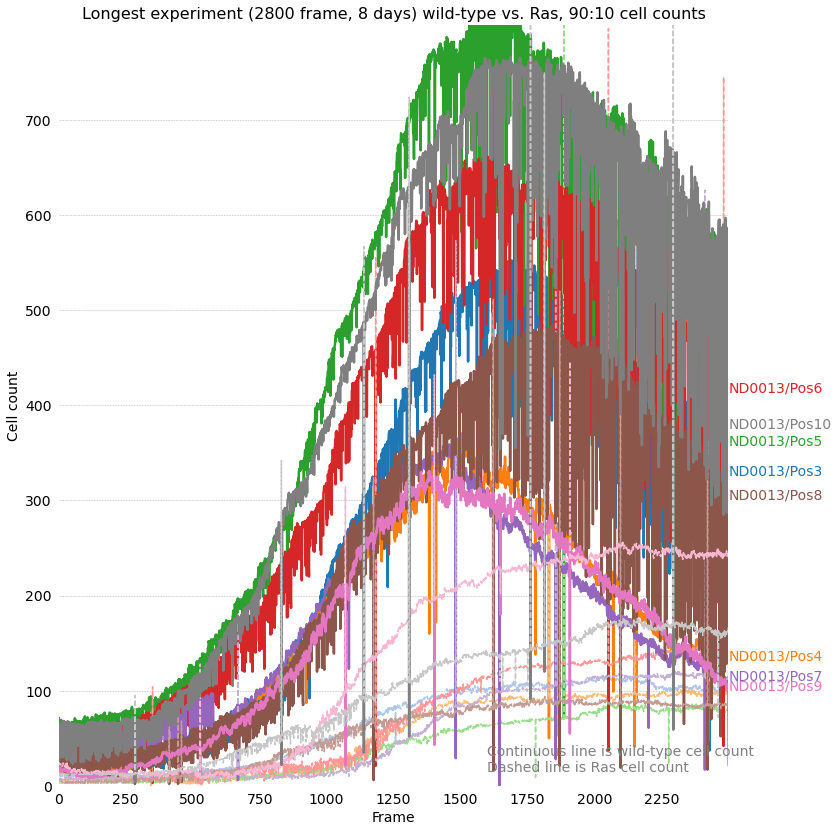

In [115]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010:
    wt_count = cell_count[expt]['wt']#movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[length]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = cell_count[expt]['ras']#movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.title('Longest experiment (2800 frame, 8 days) wild-type vs. Ras, 90:10 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.text(1600, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count', fontsize=14, c = 'gray' )

plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/ND13_9010_wtras_raw.pdf', bbox_inches = 'tight')

plt.show()

<Figure size 720x360 with 0 Axes>

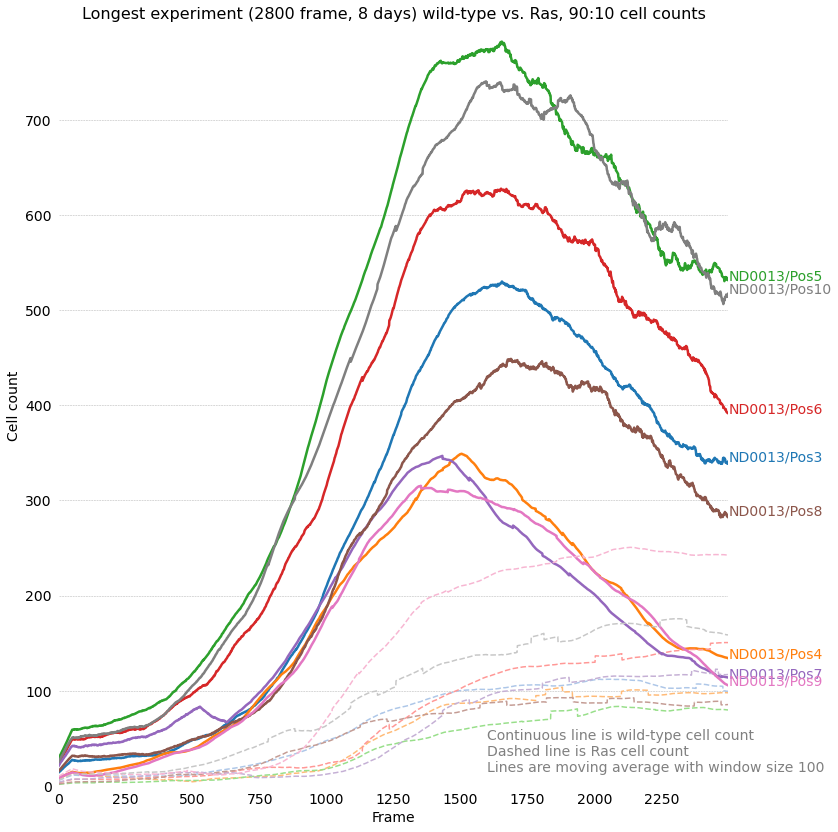

In [114]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[length]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1600, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('Longest experiment (2800 frame, 8 days) wild-type vs. Ras, 90:10 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/ND13_9010_wtras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

# testing shorter acquisitions

#### first just crop previous

In [123]:
length = 1750

<Figure size 720x360 with 0 Axes>

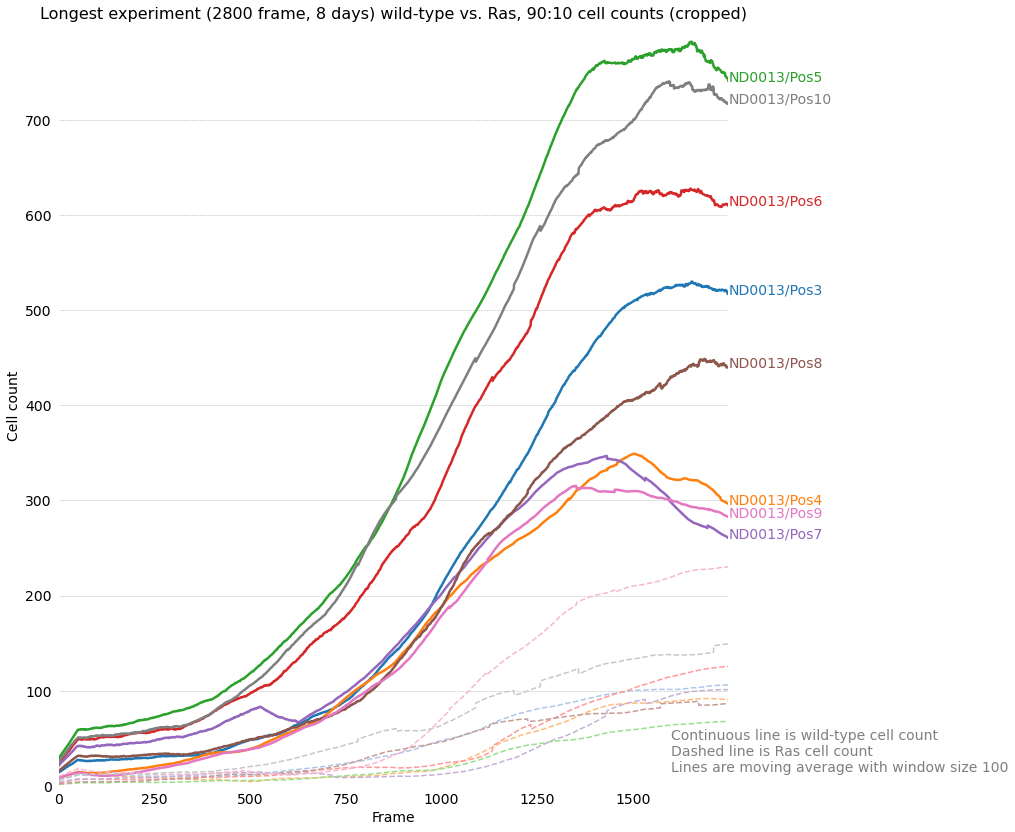

In [124]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[length]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1600, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('Longest experiment (2800 frame, 8 days) wild-type vs. Ras, 90:10 cell counts (cropped)',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/ND13_9010_wtras_smoothed_crop1750.pdf', bbox_inches = 'tight')
plt.show()

# now checking all 9010

In [125]:
expts_9010 = ['ND0013/Pos3',
'ND0013/Pos4',
'ND0013/Pos5',
'ND0013/Pos6',
'ND0013/Pos7',
'ND0013/Pos8',
'ND0013/Pos9',
'ND0013/Pos10',
'ND0010/Pos10',
'ND0010/Pos11',
'ND0011/Pos6',
'ND0011/Pos7',
'ND0012/Pos3',
'ND0012/Pos4',
'ND0012/Pos6',
'ND0012/Pos7',
'ND0012/Pos8',
'ND0012/Pos9']

In [127]:
length = 2800

<Figure size 720x360 with 0 Axes>

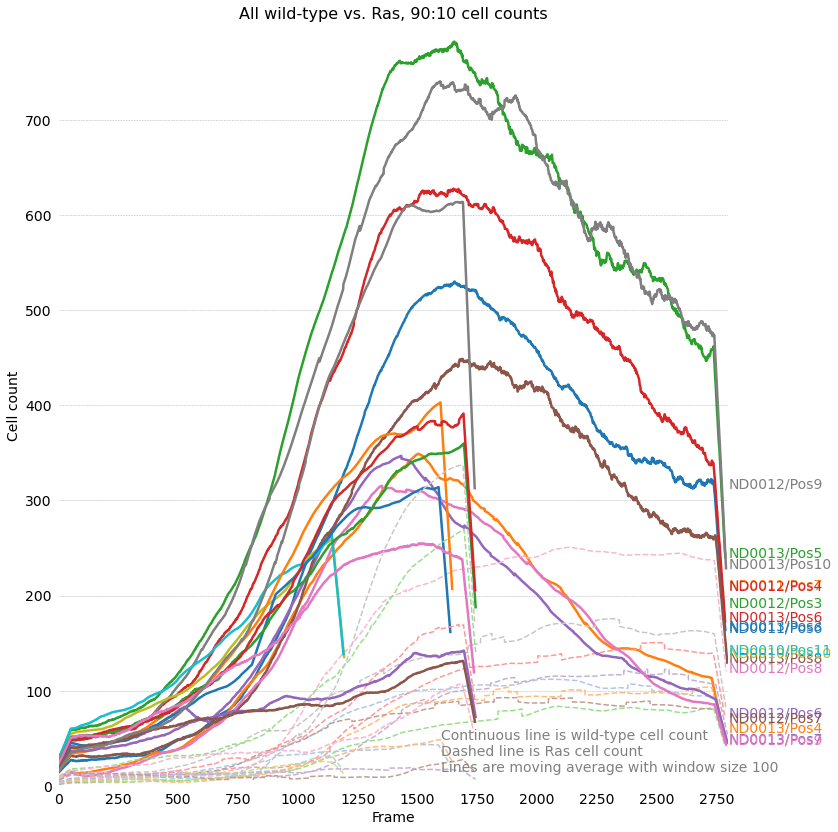

In [131]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[-1]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1600, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('All wild-type vs. Ras, 90:10 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/9010_wtras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

# uninduced

In [146]:
expts_9010_unind = ['ND0010/Pos8',
'ND0010/Pos9',
'ND0011/Pos4',
'ND0011/Pos5',
'ND0012/Pos1',
'ND0012/Pos2',
'ND0013/Pos2']

In [155]:
length = 2800
max_N_cell = 1200

<Figure size 720x360 with 0 Axes>

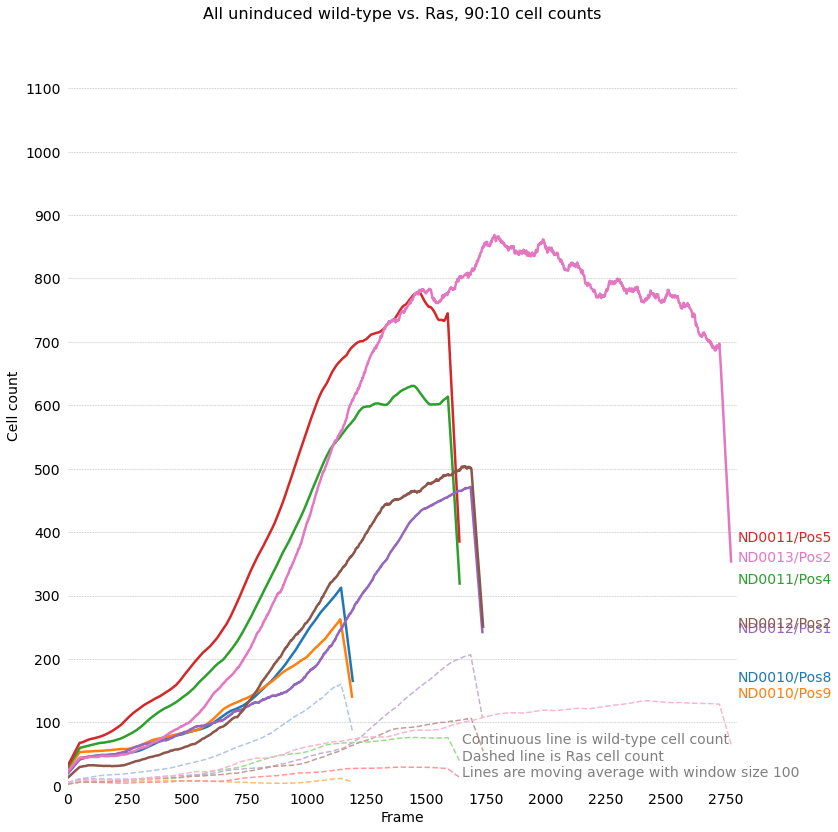

In [156]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010_unind:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[-1]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1650, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('All uninduced wild-type vs. Ras, 90:10 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/unind_9010_wtras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

# just checking shorter 9010 ind vs unind

In [159]:
expts_9010_unind = [#'ND0010/Pos8',
#'ND0010/Pos9',
'ND0011/Pos4',
'ND0011/Pos5',
'ND0012/Pos1',
'ND0012/Pos2',
'ND0013/Pos2']

In [164]:
length = 1500
max_N_cell = 800

<Figure size 720x360 with 0 Axes>

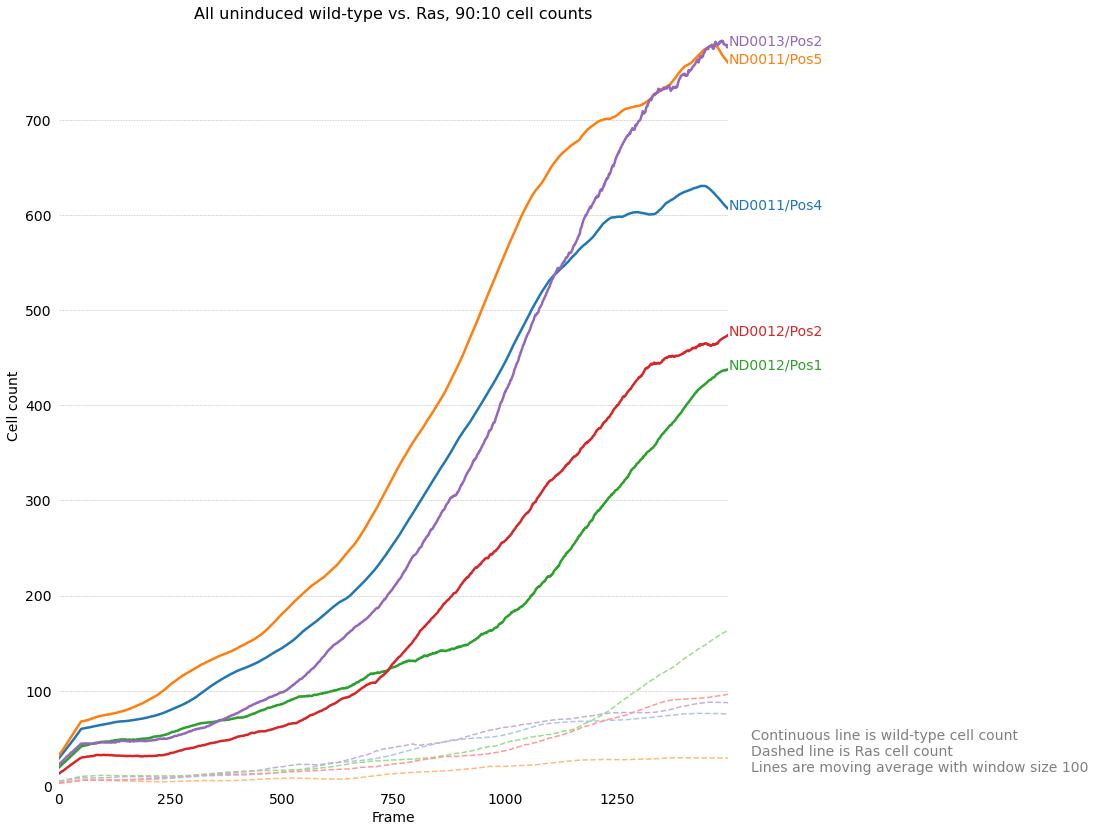

In [168]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010_unind:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[length]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1550, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('All uninduced wild-type vs. Ras, 90:10 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/unind_cropped_9010_wtras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

# checking uninduced vs induced

In [177]:
expts_9010_unind = [#'ND0010/Pos8',
#'ND0010/Pos9',
'ND0011/Pos4',
'ND0011/Pos5',
'ND0012/Pos1',
'ND0012/Pos2',
'ND0013/Pos2']
expts_9010_ind = ['ND0013/Pos3',
'ND0013/Pos4',
'ND0013/Pos5',
'ND0013/Pos6',
'ND0013/Pos7',
'ND0013/Pos8',
'ND0013/Pos9',
'ND0013/Pos10',
# 'ND0010/Pos10',
# 'ND0010/Pos11',
'ND0011/Pos6',
'ND0011/Pos7',
'ND0012/Pos3',
'ND0012/Pos4',
'ND0012/Pos6',
'ND0012/Pos7',
'ND0012/Pos8',
'ND0012/Pos9']

In [186]:
max_N_cell = 350
length = 1600

<Figure size 720x360 with 0 Axes>

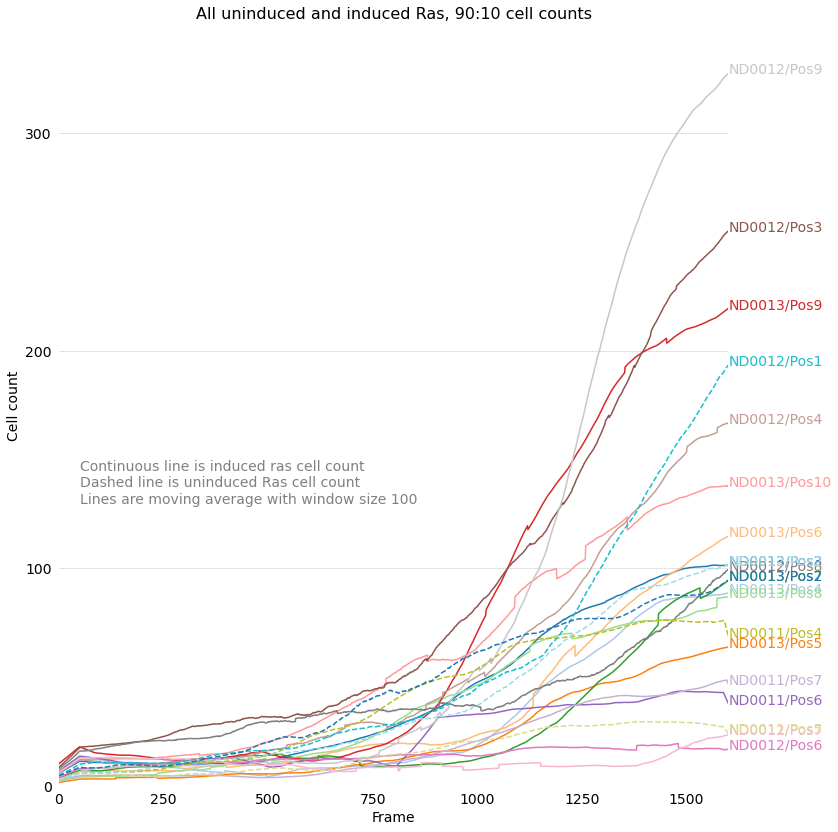

In [188]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9010_ind:
    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count,)
    y_pos = ras_count[length]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

for expt in expts_9010_unind:
    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
    y_pos = ras_count[length]# + 5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

plt.text(50, 130, 'Continuous line is induced ras cell count \nDashed line is uninduced Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('All uninduced and induced Ras, 90:10 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/unind_and_ind_RAS_only_cropped_9010_ras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

# now 9901 (all expts)

In [130]:
expts_9901 = ['ND0010/Pos6',
'ND0010/Pos7',
'ND0012/Pos5']

In [139]:
length = 1100
max_N_cell = 1000

<Figure size 720x360 with 0 Axes>

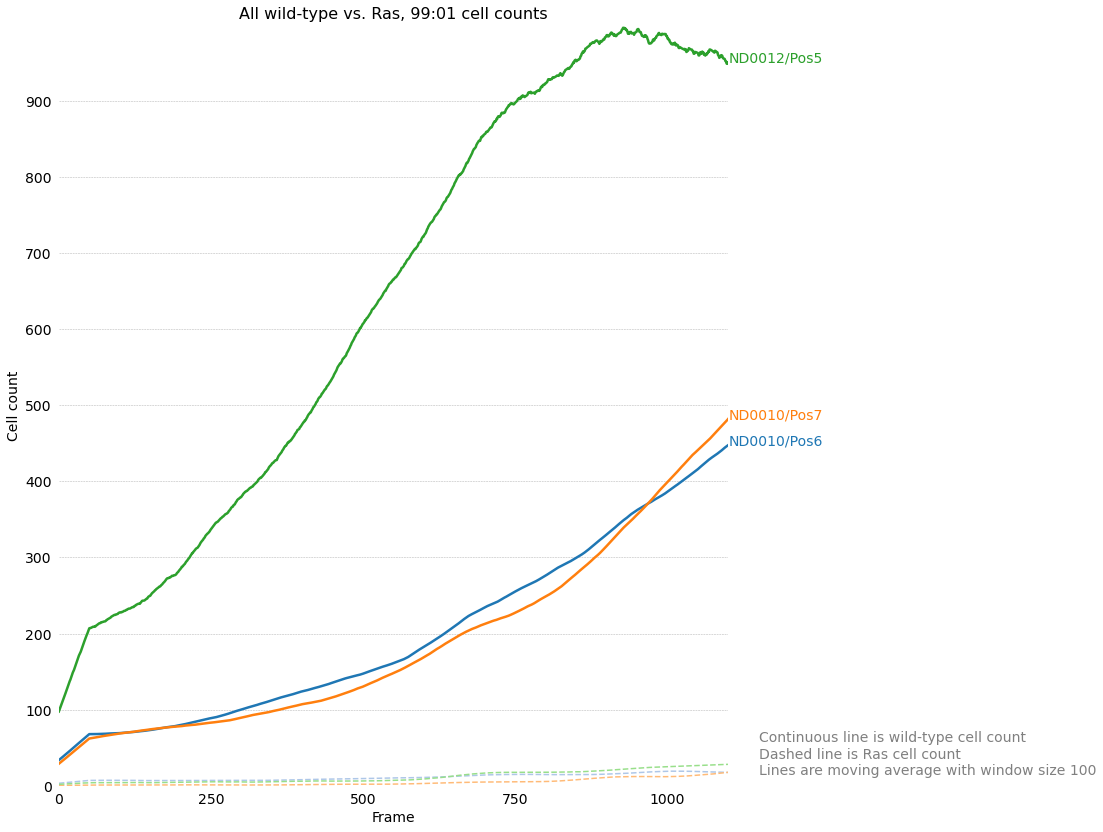

In [144]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9901:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[1100]
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1150, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('All wild-type vs. Ras, 99:01 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/9901_wtras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

In [136]:
expts_9901_unind = ['ND0010/Pos4','ND0010/Pos5']

<Figure size 720x360 with 0 Axes>

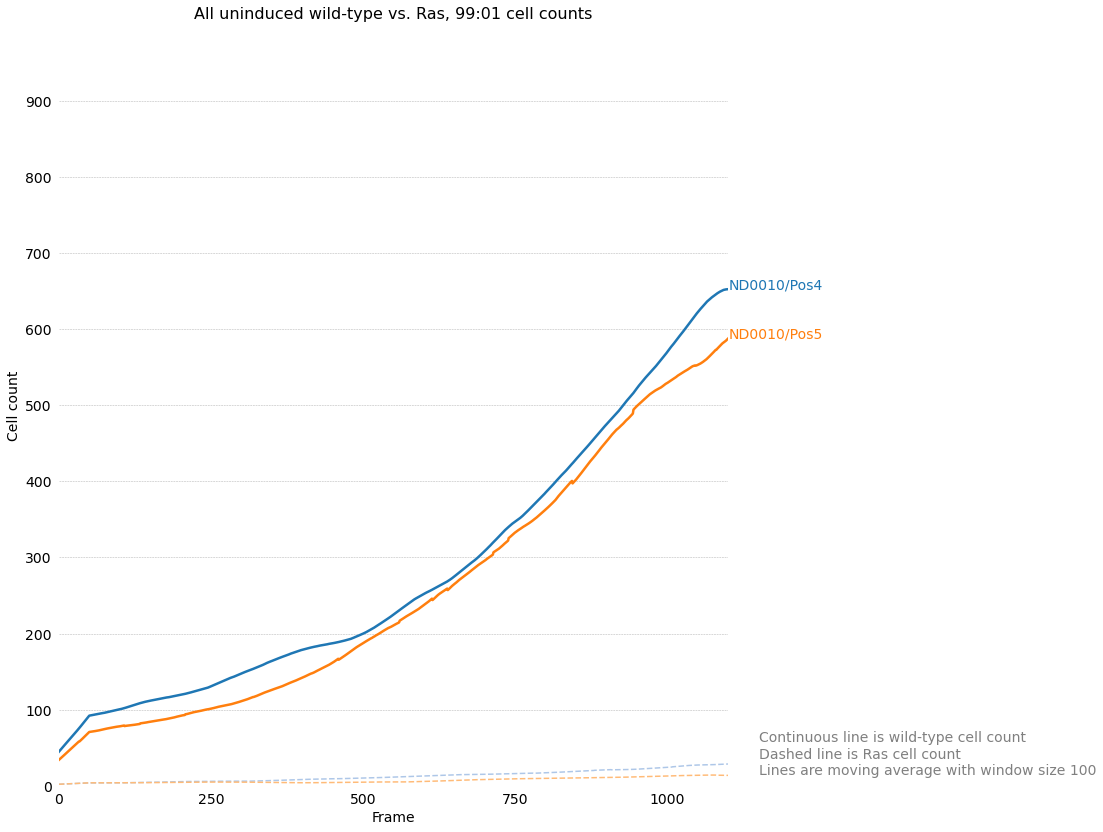

In [147]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(0, length)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 250))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')# frames')
ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in expts_9901_unind:
    wt_count = movingaverage(cell_count[expt]['wt'], 100)
    line, = ax.plot(wt_count, lw = 2.5)
    y_pos = wt_count[1100]
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())

    ras_count = movingaverage(cell_count[expt]['ras'], 100)
    line, = ax.plot(ras_count, ls = 'dashed')
plt.text(1150, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
plt.title('All uninduced wild-type vs. Ras, 99:01 cell counts',  fontsize=16,)
plt.xlabel('Frame',  fontsize=14,)
plt.ylabel('Cell count',  fontsize=14,)
plt.savefig('/home/nathan/data/results/ras/cell_counts/graphs/unind_9901_wtras_smoothed.pdf', bbox_inches = 'tight')
plt.show()

# just plotting one graph

In [40]:
cell_count

,wt,ras
0,38,13
1,41,14
2,36,13
3,40,13
4,29,12
...,...,...
2783,348,89
2784,357,90
2785,345,90
2786,357,89


In [55]:
y_av = movingaverage(cell_count['wt'], 10)


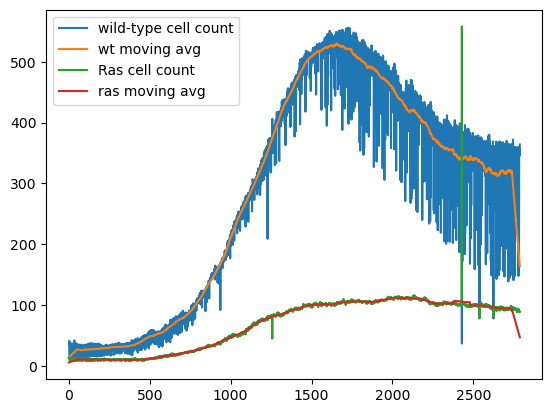

In [59]:
plt.clf()
plt.plot(cell_count['wt'], label = 'wild-type cell count')
plt.plot(movingaverage(cell_count['wt'], 100), label = 'wt moving avg')
plt.plot(cell_count['ras'], label = 'Ras cell count')
plt.plot(movingaverage(cell_count['ras'], 100), label = 'ras moving avg')
plt.legend(loc = 'upper left')
plt.show()

In [60]:
N = {'wild-type cells': [], 'ras cells': []}
cell_count = pd.DataFrame(data=N)

In [62]:
for n, i in enumerate(image_generator(mask_files[0:100])):
        count_gfp = nd.label(i == 1)[-1]
        count_rfp = nd.label(i == 2)[-1]
        cell_count['wild-type count'] = [n, nd.label(i == 1)[-1]]
        cell_count['ras count'] = [n, nd.label(i == 2)[-1]]

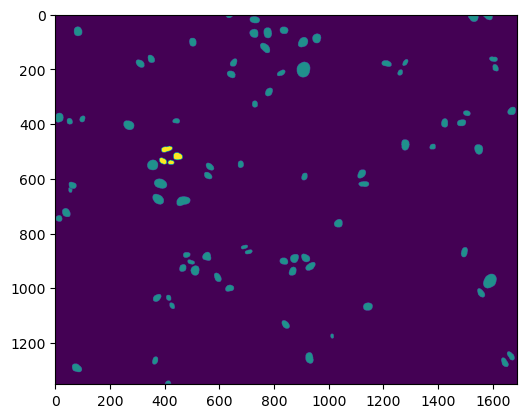

In [85]:
plt.imshow(i)
plt.show()

In [84]:
count_gfp, count_rfp

(338381, 9110)

In [56]:
len(gfp_objs)

2391

In [57]:
len(rfp_objs)

1188

# testing nd0010 pos3

### manually count each segment in each frame according to type

In [86]:
count_gfp, count_rfp = 0, 0

for i in image_generator(glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*')):
        count_gfp += nd.label(i == 1)[-1]
        count_rfp += nd.label(i == 2)[-1]

# manual count

In [92]:
count_rfp

657125

# obj count from .h5

In [89]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_1.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects

[INFO][2022/02/03 08:01:01 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_1.h5...
[INFO][2022/02/03 08:01:02 pm] Loading objects/obj_type_2 (1184, 5) (1184 filtered: None)
[INFO][2022/02/03 08:01:02 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_1.h5


In [91]:
len(rfp_objs)

1184

# testing relocalisation nd10pos3

In [93]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_2.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects

[INFO][2022/02/04 09:56:33 am] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_2.h5...
[INFO][2022/02/04 09:56:34 am] Loading objects/obj_type_2 (1184, 5) (1184 filtered: None)
[INFO][2022/02/04 09:56:34 am] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_2.h5


In [96]:
len(rfp_objs), count_rfp

(1184, 657125)

In [102]:
[obj.t for obj in rfp_objs][-1]

1188

In [103]:
len(glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*'))

1189

In [109]:
from skimage.io import imshow, imread

In [108]:
glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*')[500]

'/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/img_channel099_position003_time000000040_z000.tif'

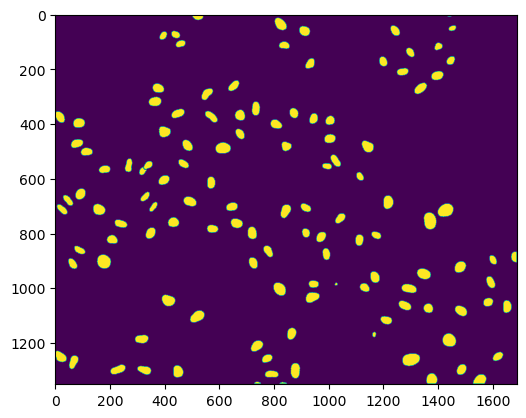

In [115]:
plt.clf()
plt.imshow(imread(glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*')[500]))
plt.show()

# function to just plot

In [111]:
def plot(cell_count, x_length, y_length, title, save_out = False):
    plt.clf()
    fig, ax = plt.subplots(1,1, figsize = (12,14))
    ax.set_prop_cycle(color=[
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])
    ax.spines[:].set_visible(False)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.set_xlim(0, x_length)
    ax.set_ylim(0, y_length)
    # # Set a fixed location and format for ticks.
    ax.set_xticks(range(0, x_length, int(x_length/10)))
    ax.set_yticks(range(0, y_length, int(y_length/10)))
    # # Use automatic StrMethodFormatter creation
    ax.xaxis.set_major_formatter('{x:.0f}')# frames')
    ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
    # # Provide tick lines across the plot to help your viewers trace along
    # the axis ticks. Make sure that the lines are light and small so they
    # don't obscure the primary data lines.
    ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    # Remove the tick marks; they are unnecessary with the tick lines we just
    # plotted. Make sure your axis ticks are large enough to be easily read.
    # You don't want your viewers squinting to read your plot.
    ax.tick_params(axis='both', which='both', labelsize=14,
                   bottom=False, top=False, labelbottom=True,
                   left=False, right=False, labelleft=True)
    
    for expt in cell_count:
        wt_count = movingaverage(cell_count[expt]['wt'], 100)
        line, = ax.plot(wt_count, lw = 2.5)
        y_pos = wt_count[x_length]
        ax.text(x_length, y_pos, expt, fontsize=14, color=line.get_color())

        ras_count = movingaverage(cell_count[expt]['ras'], 100)
        line, = ax.plot(ras_count, ls = 'dashed')
    plt.text(1150, 15, 'Continuous line is wild-type cell count \nDashed line is Ras cell count\nLines are moving average with window size 100', fontsize=14, c = 'gray' )
    plt.title(title,  fontsize=16,)
    plt.xlabel('Frame',  fontsize=14,)
    plt.ylabel('Cell count',  fontsize=14,)
    if save_out:
        plt.savefig(f'/home/nathan/data/results/ras/cell_counts/graphs/{title}.pdf', bbox_inches = 'tight')
    plt.show()

# need to redo this whole count using objects

In [8]:
import glob
from natsort import natsorted

### just nD13

In [9]:
obj_file_list = natsorted(glob.glob('/home/nathan/data/kraken/ras/ND0013/*/*.h5'))

In [10]:
obj_file_list

['/home/nathan/data/kraken/ras/ND0013/Pos0/untrans_no_bg_objects_type_1.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos0/untrans_no_bg_objects_type_2.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos1/untrans_no_bg_objects_type_1.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos1/untrans_no_bg_objects_type_2.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos2/untrans_no_bg_objects_type_1.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos2/untrans_no_bg_objects_type_2.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_1.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_2.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_1.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_2.h5',
 '/home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_1.h5',

In [14]:
expts_9010_ND13 = ['ND0013/Pos3',
'ND0013/Pos4',
'ND0013/Pos5',
'ND0013/Pos6',
'ND0013/Pos7',
'ND0013/Pos8',
'ND0013/Pos9',
'ND0013/Pos10',
#'ND0013/Pos11' #unfit due to bleomycin presence
                  ]

In [12]:
from tqdm.auto import tqdm

In [58]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_counts = {}
for expt in tqdm(expts_9010_ND13):
    obj_counts[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_counts[expt]['wt'] = []
    obj_counts[expt]['ras'] = []
    for i in tqdm(range(objs['wt'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['wt'].append(len([obj for obj in objs['wt'] if obj.t == i]))
    for i in tqdm(range(objs['ras'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['ras'].append(len([obj for obj in objs['ras'] if obj.t == i]))


  0%|          | 0/8 [00:00<?, ?it/s]

[INFO][2022/02/23 02:58:06 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 02:58:06 PM] Loading objects/obj_type_2 (190196, 5) (190196 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 02:58:08 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 02:58:08 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 02:58:08 PM] Loading objects/obj_type_1 (789815, 5) (789815 filtered: None)
[INFO][2022/02/23 02:58:19 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2787 [00:00<?, ?it/s]

  0%|          | 0/2787 [00:00<?, ?it/s]

[INFO][2022/02/23 03:00:58 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:00:58 PM] Loading objects/obj_type_2 (177837, 5) (177837 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:01:00 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:01:00 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:01:00 PM] Loading objects/obj_type_1 (601027, 5) (601027 filtered: None)
[INFO][2022/02/23 03:01:08 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos4/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2779 [00:00<?, ?it/s]

  0%|          | 0/2779 [00:00<?, ?it/s]

[INFO][2022/02/23 03:03:19 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:03:19 PM] Loading objects/obj_type_2 (126131, 5) (126131 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:03:20 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:03:20 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:03:20 PM] Loading objects/obj_type_1 (1269711, 5) (1269711 filtered: None)
[INFO][2022/02/23 03:03:37 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos5/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2787 [00:00<?, ?it/s]

  0%|          | 0/2787 [00:00<?, ?it/s]

[INFO][2022/02/23 03:07:23 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:07:23 PM] Loading objects/obj_type_2 (215487, 5) (215487 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:07:25 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:07:25 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:07:25 PM] Loading objects/obj_type_1 (1020345, 5) (1020345 filtered: None)
[INFO][2022/02/23 03:07:38 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos6/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2786 [00:00<?, ?it/s]

  0%|          | 0/2786 [00:00<?, ?it/s]

[INFO][2022/02/23 03:10:55 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos7/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:10:55 PM] Loading objects/obj_type_2 (186778, 5) (186778 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos7/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos7/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:10:58 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos7/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:10:58 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos7/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:10:58 PM] Loading objects/obj_type_1 (823989, 5) (823989 filtered: None)
[INFO][2022/02/23 03:11:08 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos7/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2796 [00:00<?, ?it/s]

  0%|          | 0/2796 [00:00<?, ?it/s]

[INFO][2022/02/23 03:13:47 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos8/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:13:47 PM] Loading objects/obj_type_2 (161770, 5) (161770 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos8/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos8/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:13:49 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos8/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:13:49 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos8/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:13:49 PM] Loading objects/obj_type_1 (690392, 5) (690392 filtered: None)
[INFO][2022/02/23 03:13:57 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos8/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2795 [00:00<?, ?it/s]

  0%|          | 0/2795 [00:00<?, ?it/s]

[INFO][2022/02/23 03:16:15 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos9/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:16:15 PM] Loading objects/obj_type_2 (445792, 5) (445792 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos9/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos9/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:16:20 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos9/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:16:20 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos9/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:16:20 PM] Loading objects/obj_type_1 (728074, 5) (728074 filtered: None)
[INFO][2022/02/23 03:16:30 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos9/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2790 [00:00<?, ?it/s]

  0%|          | 0/2790 [00:00<?, ?it/s]

[INFO][2022/02/23 03:19:48 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos10/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 03:19:48 PM] Loading objects/obj_type_2 (285481, 5) (285481 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos10/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos10/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 03:19:51 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos10/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 03:19:51 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos10/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 03:19:51 PM] Loading objects/obj_type_1 (1221652, 5) (1221652 filtered: None)
[INFO][2022/02/23 03:20:07 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos10/untrans_no_bg_objects_type_1.h5


  0%|          | 0/2790 [00:00<?, ?it/s]

  0%|          | 0/2790 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

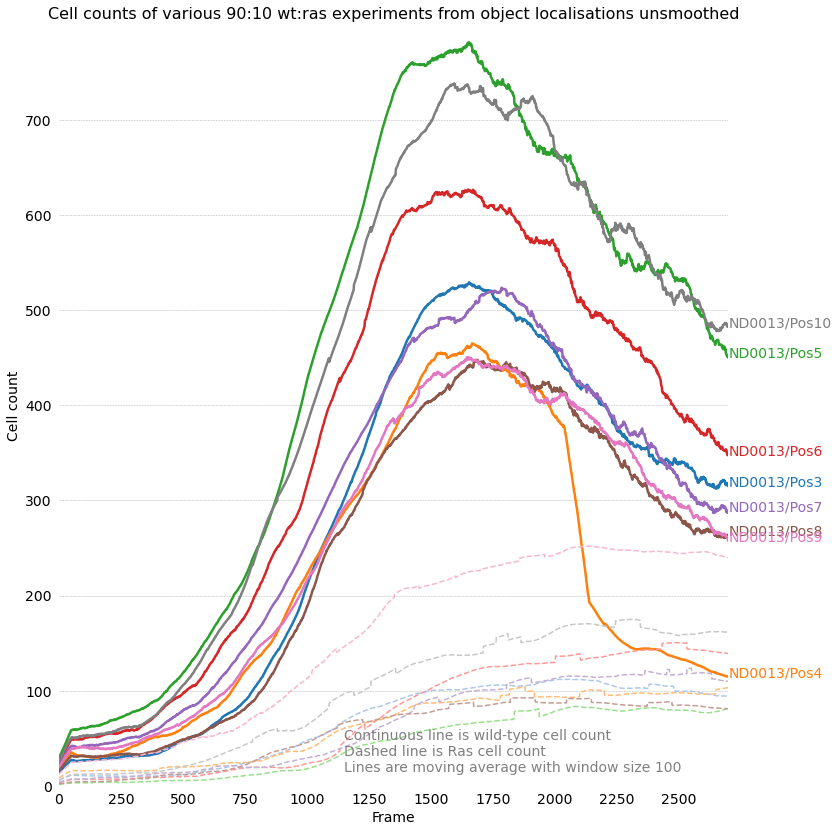

In [78]:
plot(obj_counts, 2700, 800, 'Cell counts of various 90:10 wt:ras experiments from object localisations unsmoothed', save_out = False)

# now having a look at higher seeding densities

### 2x seeding density

In [79]:
expts_9010_2x = ['ND0014/Pos1',
'ND0014/Pos2',
'ND0014/Pos3']

In [80]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_counts = {}
for expt in tqdm(expts_9010_2x):
    obj_counts[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_counts[expt]['wt'] = []
    obj_counts[expt]['ras'] = []
    for i in tqdm(range(objs['wt'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['wt'].append(len([obj for obj in objs['wt'] if obj.t == i]))
    for i in tqdm(range(objs['ras'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['ras'].append(len([obj for obj in objs['ras'] if obj.t == i]))

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO][2022/02/23 04:07:17 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:07:17 PM] Loading objects/obj_type_2 (162071, 5) (162071 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:07:19 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:07:19 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:07:19 PM] Loading objects/obj_type_1 (768779, 5) (768779 filtered: None)
[INFO][2022/02/23 04:07:29 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1419 [00:00<?, ?it/s]

  0%|          | 0/1419 [00:00<?, ?it/s]

[INFO][2022/02/23 04:08:54 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:08:54 PM] Loading objects/obj_type_2 (49879, 5) (49879 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:08:54 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:08:54 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:08:55 PM] Loading objects/obj_type_1 (970046, 5) (970046 filtered: None)
[INFO][2022/02/23 04:09:07 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

[INFO][2022/02/23 04:10:26 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:10:26 PM] Loading objects/obj_type_2 (52725, 5) (52725 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:10:27 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:10:27 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:10:27 PM] Loading objects/obj_type_1 (828338, 5) (828338 filtered: None)
[INFO][2022/02/23 04:10:37 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1427 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

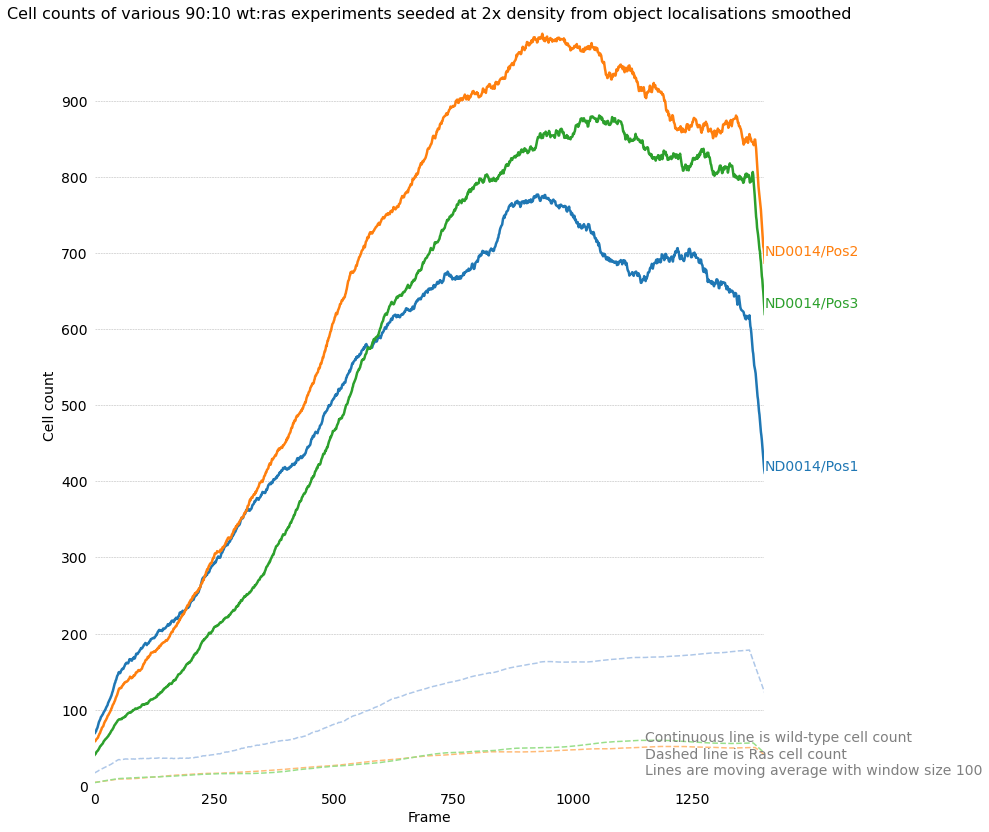

In [83]:
plot(obj_counts, 1400, 1000, 'Cell counts of various 90:10 wt:ras experiments seeded at 2x density from object localisations smoothed', save_out = True)

In [87]:
expts_9010_1x_and_2x = ['ND0014/Pos0', 'ND0014/Pos1',
'ND0014/Pos2',
'ND0014/Pos3', 'ND0014/Pos4'
                       ]

In [88]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_counts = {}
for expt in tqdm(expts_9010_1x_and_2x):
    obj_counts[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_counts[expt]['wt'] = []
    obj_counts[expt]['ras'] = []
    for i in tqdm(range(objs['wt'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['wt'].append(len([obj for obj in objs['wt'] if obj.t == i]))
    for i in tqdm(range(objs['ras'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['ras'].append(len([obj for obj in objs['ras'] if obj.t == i]))

  0%|          | 0/5 [00:00<?, ?it/s]

[INFO][2022/02/23 04:28:35 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:28:35 PM] Loading objects/obj_type_2 (3155, 5) (3155 filtered: None)
[INFO][2022/02/23 04:28:35 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:28:35 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:28:35 PM] Loading objects/obj_type_1 (139839, 5) (139839 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:28:37 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1427 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

[INFO][2022/02/23 04:28:51 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:28:51 PM] Loading objects/obj_type_2 (162071, 5) (162071 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:28:53 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:28:53 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:28:53 PM] Loading objects/obj_type_1 (768779, 5) (768779 filtered: None)
[INFO][2022/02/23 04:29:02 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos1/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1419 [00:00<?, ?it/s]

  0%|          | 0/1419 [00:00<?, ?it/s]

[INFO][2022/02/23 04:30:15 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:30:15 PM] Loading objects/obj_type_2 (49879, 5) (49879 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:30:15 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:30:15 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:30:15 PM] Loading objects/obj_type_1 (970046, 5) (970046 filtered: None)
[INFO][2022/02/23 04:30:28 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos2/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

[INFO][2022/02/23 04:31:53 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:31:53 PM] Loading objects/obj_type_2 (52725, 5) (52725 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:31:53 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:31:53 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:31:53 PM] Loading objects/obj_type_1 (828338, 5) (828338 filtered: None)
[INFO][2022/02/23 04:32:03 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos3/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1427 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

[INFO][2022/02/23 04:33:10 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos4/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:33:10 PM] Loading objects/obj_type_2 (26233, 5) (26233 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos4/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos4/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:33:11 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos4/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:33:11 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos4/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:33:11 PM] Loading objects/obj_type_1 (92478, 5) (92478 filtered: None)
[INFO][2022/02/23 04:33:13 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos4/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1425 [00:00<?, ?it/s]

  0%|          | 0/1425 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

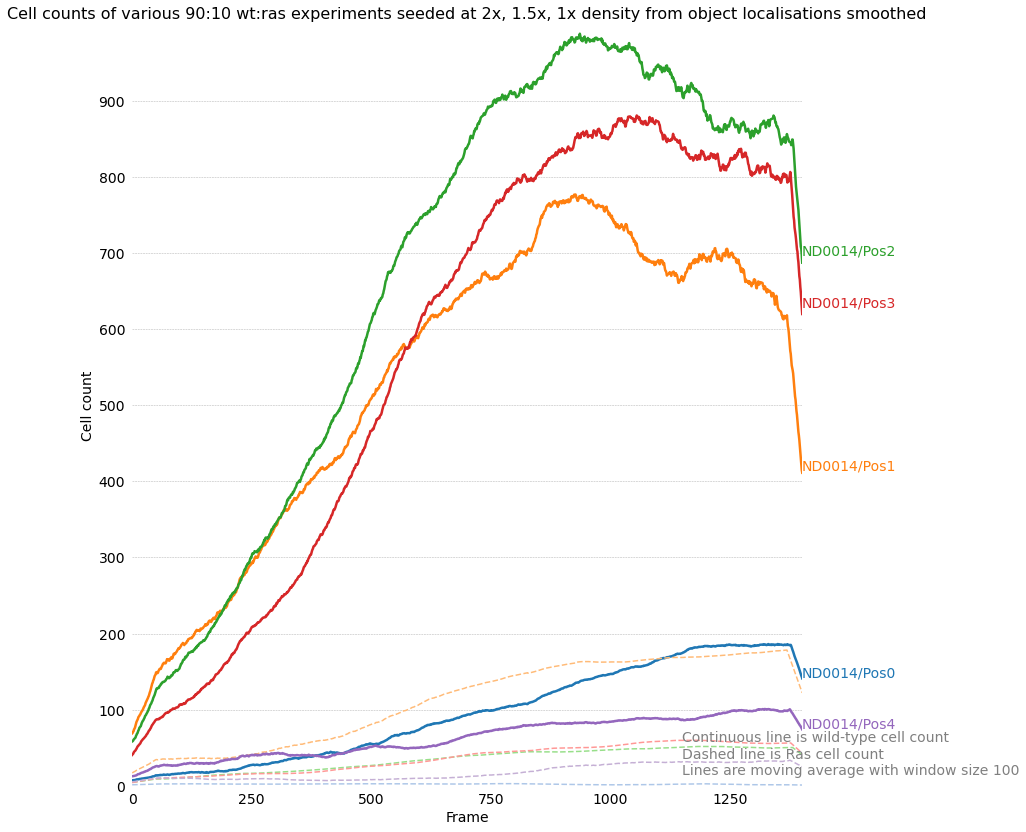

In [89]:
plot(obj_counts, 1400, 1000, 'Cell counts of various 90:10 wt:ras experiments seeded at 2x, 1.5x, 1x density from object localisations smoothed', save_out = True)

In [90]:
expts_9901_1x_and_2x = ['ND0014/Pos5', 'ND0014/Pos6',
'ND0014/Pos7',
'ND0014/Pos8',
'ND0014/Pos9',
'ND0014/Pos10']

In [103]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_counts = {}
for expt in tqdm(expts_9901_1x_and_2x):
    obj_counts[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_counts[expt]['wt'] = []
    obj_counts[expt]['ras'] = []
    for i in tqdm(range(objs['wt'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['wt'].append(len([obj for obj in objs['wt'] if obj.t == i]))
    for i in tqdm(range(objs['ras'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['ras'].append(len([obj for obj in objs['ras'] if obj.t == i]))

  0%|          | 0/6 [00:00<?, ?it/s]

[INFO][2022/02/23 05:01:05 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos5/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:01:05 PM] Loading objects/obj_type_2 (40853, 5) (40853 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos5/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos5/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:01:06 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos5/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:01:06 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos5/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:01:06 PM] Loading objects/obj_type_1 (147392, 5) (147392 filtered: None)
[INFO][2022/02/23 05:01:08 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos5/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1424 [00:00<?, ?it/s]

  0%|          | 0/1424 [00:00<?, ?it/s]

[INFO][2022/02/23 05:01:25 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos6/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:01:25 PM] Loading objects/obj_type_2 (5876, 5) (5876 filtered: None)
[INFO][2022/02/23 05:01:25 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos6/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:01:25 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos6/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:01:25 PM] Loading objects/obj_type_1 (91141, 5) (91141 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos6/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos6/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:01:27 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos6/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

[INFO][2022/02/23 05:01:35 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos7/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:01:35 PM] Loading objects/obj_type_2 (6876, 5) (6876 filtered: None)
[INFO][2022/02/23 05:01:35 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos7/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:01:35 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos7/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:01:35 PM] Loading objects/obj_type_1 (145141, 5) (145141 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos7/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos7/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:01:37 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos7/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1427 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

[INFO][2022/02/23 05:01:50 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:01:50 PM] Loading objects/obj_type_2 (22397, 5) (22397 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:01:50 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:01:50 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:01:50 PM] Loading objects/obj_type_1 (267349, 5) (267349 filtered: None)
[INFO][2022/02/23 05:01:54 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1426 [00:00<?, ?it/s]

  0%|          | 0/1426 [00:00<?, ?it/s]

[INFO][2022/02/23 05:02:17 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:02:17 PM] Loading objects/obj_type_2 (3809, 5) (3809 filtered: None)
[INFO][2022/02/23 05:02:17 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:02:17 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:02:17 PM] Loading objects/obj_type_1 (371014, 5) (371014 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:02:22 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1428 [00:00<?, ?it/s]

  0%|          | 0/1428 [00:00<?, ?it/s]

[INFO][2022/02/23 05:02:54 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos10/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:02:54 PM] Loading objects/obj_type_2 (2308, 5) (2308 filtered: None)
[INFO][2022/02/23 05:02:54 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos10/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:02:54 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos10/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:02:54 PM] Loading objects/obj_type_1 (150677, 5) (150677 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos10/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos10/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:02:56 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos10/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1424 [00:00<?, ?it/s]

  0%|          | 0/1423 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

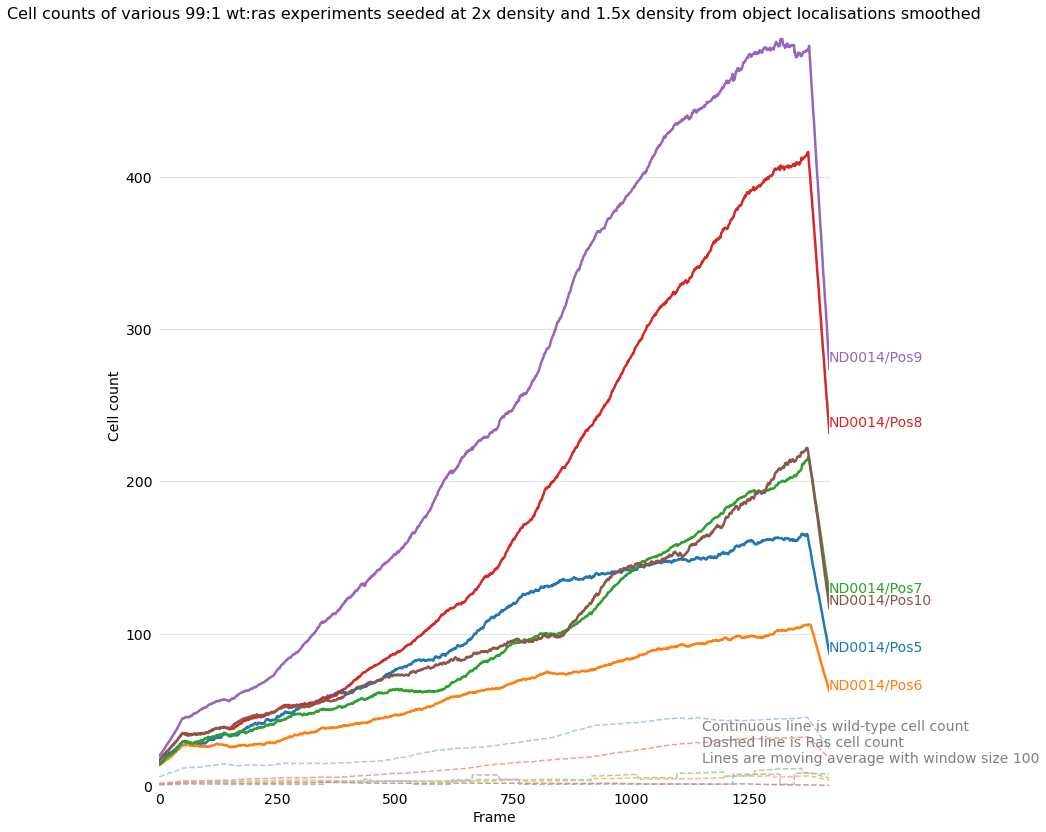

In [104]:
plot(obj_counts, 1420, 500, 'Cell counts of various 99:1 wt:ras experiments seeded at 2x density and 1.5x density from object localisations smoothed', save_out = True)

In [97]:
expts_9901_2x = [

'ND0014/Pos8',
'ND0014/Pos9',
]

In [100]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_counts = {}
for expt in tqdm(expts_9901_2x):
    obj_counts[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_counts[expt]['wt'] = []
    obj_counts[expt]['ras'] = []
    for i in tqdm(range(objs['wt'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['wt'].append(len([obj for obj in objs['wt'] if obj.t == i]))
    for i in tqdm(range(objs['ras'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['ras'].append(len([obj for obj in objs['ras'] if obj.t == i]))

  0%|          | 0/2 [00:00<?, ?it/s]

[INFO][2022/02/23 04:53:46 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:53:46 PM] Loading objects/obj_type_2 (22397, 5) (22397 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:53:47 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:53:47 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:53:47 PM] Loading objects/obj_type_1 (267349, 5) (267349 filtered: None)
[INFO][2022/02/23 04:53:51 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos8/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1426 [00:00<?, ?it/s]

  0%|          | 0/1426 [00:00<?, ?it/s]

[INFO][2022/02/23 04:54:18 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 04:54:18 PM] Loading objects/obj_type_2 (3809, 5) (3809 filtered: None)
[INFO][2022/02/23 04:54:18 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 04:54:18 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 04:54:18 PM] Loading objects/obj_type_1 (371014, 5) (371014 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 04:54:22 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos9/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1428 [00:00<?, ?it/s]

  0%|          | 0/1428 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

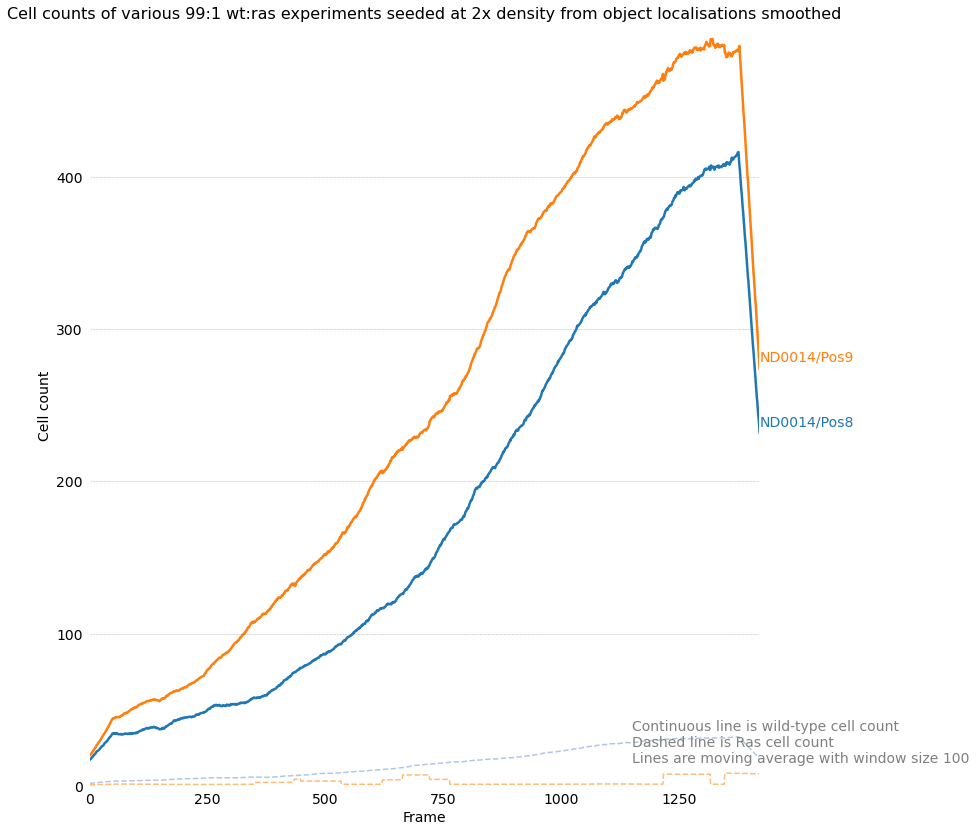

In [102]:
plot(obj_counts, 1420, 500, 'Cell counts of various 99:1 wt:ras experiments seeded at 2x density from object localisations smoothed', save_out = True)

In [105]:
expts_9901_indvsunind = [

'ND0014/Pos0',
'ND0014/Pos13',
]

In [106]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_counts = {}
for expt in tqdm(expts_9901_indvsunind):
    obj_counts[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_counts[expt]['wt'] = []
    obj_counts[expt]['ras'] = []
    for i in tqdm(range(objs['wt'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['wt'].append(len([obj for obj in objs['wt'] if obj.t == i]))
    for i in tqdm(range(objs['ras'][-1].t)):
    ## count cells in that frame
        obj_counts[expt]['ras'].append(len([obj for obj in objs['ras'] if obj.t == i]))

  0%|          | 0/2 [00:00<?, ?it/s]

[INFO][2022/02/23 05:03:09 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:03:09 PM] Loading objects/obj_type_2 (3155, 5) (3155 filtered: None)
[INFO][2022/02/23 05:03:09 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:03:09 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:03:09 PM] Loading objects/obj_type_1 (139839, 5) (139839 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:03:11 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos0/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1427 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

[INFO][2022/02/23 05:03:25 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos13/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 05:03:25 PM] Loading objects/obj_type_2 (11716, 5) (11716 filtered: None)
[INFO][2022/02/23 05:03:25 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos13/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 05:03:25 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0014/Pos13/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 05:03:25 PM] Loading objects/obj_type_1 (69826, 5) (69826 filtered: None)


/home/nathan/data/kraken/ras/ND0014/Pos13/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0014/Pos13/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 05:03:27 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0014/Pos13/untrans_no_bg_objects_type_1.h5


  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

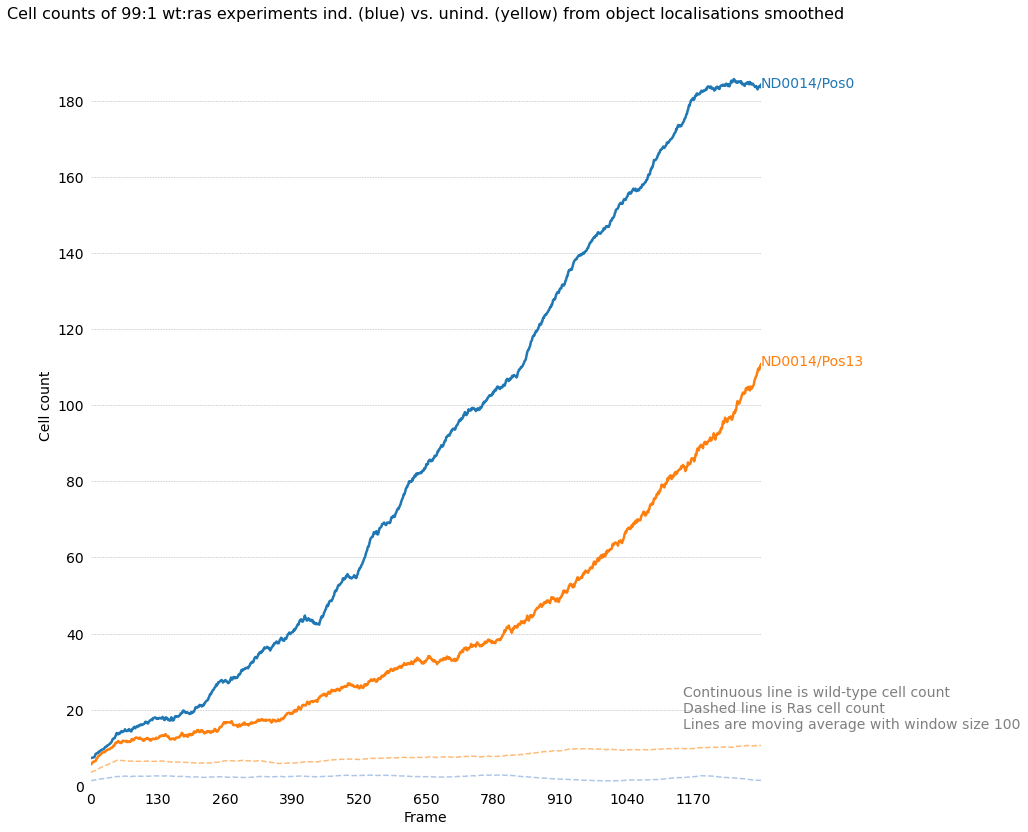

In [113]:
plot(obj_counts, 1300, 200, 'Cell counts of 99:1 wt:ras experiments ind. (blue) vs. unind. (yellow) from object localisations smoothed', save_out = True)

# looking at frequencies of classifications

In [129]:
wt_objs[0]

,ID,x,y,z,t,dummy,states,label,prob,area,class id,prob_anaphase,prob_apoptosis,prob_interphase,prob_metaphase,prob_prometaphase
0,0,937.447876,61.185154,0.0,0,False,0,4,0.0,1199.0,1.0,5.175814e-16,1.0,2.013923e-08,5.781066e-17,1.122223e-21


In [130]:
label = []
for i in wt_objs:
    label.append(i.label)

In [131]:
wt_label = label

(array([697057.,      0.,   9388.,      0.,      0.,   4860.,      0.,
         16465.,      0.,  62045.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

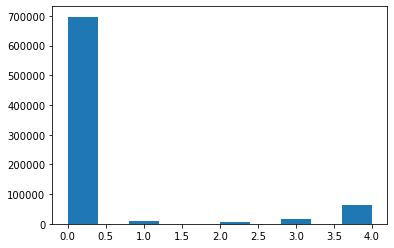

In [132]:
plt.hist(wt_label)

In [133]:
ras_label = []
for i in ras_objs:
    ras_label.append(i.label)
    label.append(i.label)

(array([157146.,      0.,   1274.,      0.,      0.,   3926.,      0.,
          6341.,      0.,  21509.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

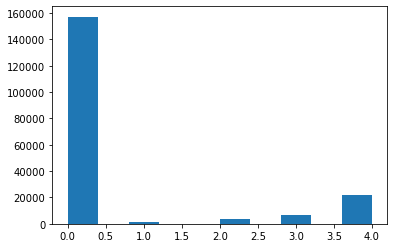

In [134]:
plt.hist(ras_label)

(array([854203.,      0.,  10662.,      0.,      0.,   8786.,      0.,
         22806.,      0.,  83554.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

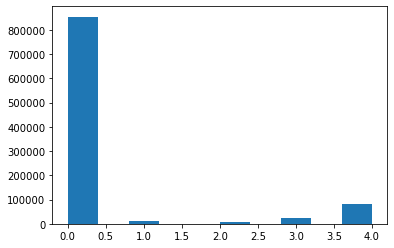

In [135]:
plt.hist(label)

In [143]:
probs = ['prob_apoptosis', 'prob_anaphase','prob_interphase', 'prob_metaphase', 'prob_prometaphase']

In [145]:
for prob in probs:
    print(objs['wt'][0].properties[prob])

1.0
5.1758144e-16
2.0139227e-08
5.781066e-17
1.1222229e-21


In [142]:
objs['wt'][0].properties['prob_apoptosis']

1.0

In [140]:
objs['wt'][0]

,ID,x,y,z,t,dummy,states,label,prob,area,class id,prob_anaphase,prob_apoptosis,prob_interphase,prob_metaphase,prob_prometaphase
0,0,937.447876,61.185154,0.0,0,False,0,4,0.0,1199.0,1.0,5.175814e-16,1.0,2.013923e-08,5.781066e-17,1.122223e-21


In [ ]:
obj_probs = {}
for i in tqdm(range(len(objs['wt']))):
    obj_probs[expt]['wt'] = {}
    for prob in probs:
        obj_counts[expt]['wt'][prob]+= objs['wt'][i].properties[prob]

In [147]:
## need to do per expt and measure something otherwise kernel crashes
objs = {}
obj_probs = {}
for expt in tqdm(expts_9010_ND13):
    obj_probs[expt] = {}
    wt_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_1.h5')
    ras_file = os.path.join('/home/nathan/data/kraken/ras/', expt, 'untrans_no_bg_objects_type_2.h5')
    print(wt_file, ras_file)
    with btrack.dataio.HDF5FileHandler(
         ras_file, 'r', obj_type='obj_type_2',
    ) as hdf:
        ras_objs = hdf.objects
    with btrack.dataio.HDF5FileHandler(
         wt_file, 'r', obj_type='obj_type_1',
    ) as hdf:
        wt_objs = hdf.objects
    ## filter objs for size (rewriting objs in each expt for memory)
    objs['wt'] = [obj for obj in wt_objs if obj.properties['area'] > 50]
    objs['ras'] = [obj for obj in ras_objs if obj.properties['area'] > 50]
    
    obj_probs[expt]['wt'] = {}
    obj_probs[expt]['ras'] = {}
    for prob in probs:
        obj_probs[expt]['wt'][prob], obj_probs[expt]['ras'][prob] = 0, 0
        for i in tqdm(range(len(objs['wt']))):
            obj_probs[expt]['wt'][prob]+= objs['wt'][i].properties[prob]
        for i in tqdm(range(len(objs['ras']))):
            obj_probs[expt]['ras'][prob]+= objs['ras'][i].properties[prob]
    break

  0%|          | 0/8 [00:00<?, ?it/s]

[INFO][2022/02/23 06:01:12 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5...
[INFO][2022/02/23 06:01:12 PM] Loading objects/obj_type_2 (190196, 5) (190196 filtered: None)


/home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5 /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5


[INFO][2022/02/23 06:01:14 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_2.h5
[INFO][2022/02/23 06:01:14 PM] Opening HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5...
[INFO][2022/02/23 06:01:14 PM] Loading objects/obj_type_1 (789815, 5) (789815 filtered: None)
[INFO][2022/02/23 06:01:24 PM] Closing HDF file: /home/nathan/data/kraken/ras/ND0013/Pos3/untrans_no_bg_objects_type_1.h5


  0%|          | 0/788947 [00:00<?, ?it/s]

  0%|          | 0/189917 [00:00<?, ?it/s]

  0%|          | 0/788947 [00:00<?, ?it/s]

  0%|          | 0/189917 [00:00<?, ?it/s]

  0%|          | 0/788947 [00:00<?, ?it/s]

  0%|          | 0/189917 [00:00<?, ?it/s]

  0%|          | 0/788947 [00:00<?, ?it/s]

  0%|          | 0/189917 [00:00<?, ?it/s]

  0%|          | 0/788947 [00:00<?, ?it/s]

  0%|          | 0/189917 [00:00<?, ?it/s]

In [151]:
import pandas

In [153]:
obj_probs['ND0013/Pos3']['wt']

{'prob_apoptosis': 61219.59370524373,
 'prob_anaphase': 17042.764171915416,
 'prob_interphase': 693857.7193710982,
 'prob_metaphase': 5306.890925014461,
 'prob_prometaphase': 11520.061286588052}

In [156]:
df = pandas.DataFrame.from_dict(obj_probs['ND0013/Pos3']['wt'], orient = 'index', columns = ['cumulative probability'])

<AxesSubplot:>

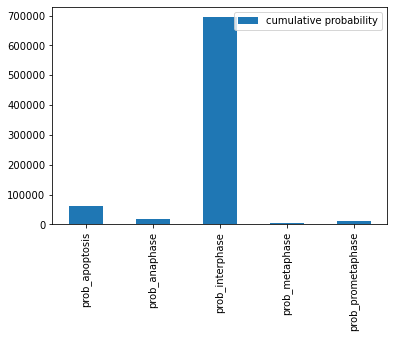

In [160]:
df.plot(kind = 'bar')

# what other properties can i measure from prexisting radial analysis script without retracking

In [35]:
expt = 'ND0013/Pos5'

In [36]:
wt_file = os.path.join('/home/nathan/data/kraken/scr/', expt, 'untrans_no_bg_objects_type_1.h5')

In [53]:
with btrack.dataio.HDF5FileHandler(
         '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5', 'r', obj_type='obj_type_2',
    ) as hdf:
        wt_objs = hdf.objects
        wt_seg = hdf.segmentation

[INFO][2022/02/24 03:23:13 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2022/02/24 03:23:13 PM] Loading objects/obj_type_2 (65619, 5) (65619 filtered: None)
[INFO][2022/02/24 03:23:36 PM] Loading segmentation (1043, 1200, 1600)
[INFO][2022/02/24 03:23:36 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5


In [56]:
from skimage.io import imshow

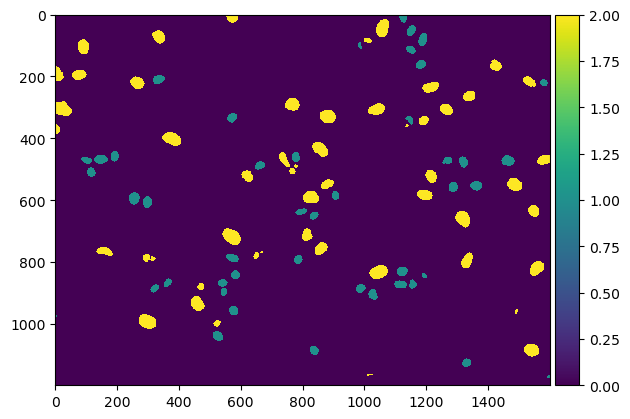

In [59]:
plt.clf()
imshow(wt_seg[0])
plt.show()

In [46]:
cell = wt_objs[0]

In [52]:
wt_objs[-1]

,ID,x,y,z,t,dummy,states,label,prob
0,65618,1198.088867,161.0,0.0,1042,False,0,3,0.0


# retroactively add regionprops to tracking files

In [7]:
with btrack.dataio.HDF5FileHandler(
         '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5', 'r', obj_type='obj_type_2',
    ) as hdf:
        wt_objs = hdf.objects
        

[INFO][2022/02/24 04:08:27 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2022/02/24 04:08:27 PM] Loading objects/obj_type_2 (105105, 5) (105105 filtered: None)
[INFO][2022/02/24 04:08:28 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5


In [61]:
type(wt_objs[0])

btrack.btypes.PyTrackObject

In [65]:
wt_objs[0].t

0

In [ ]:
t, x, y = wt_objs[0].t, wt_objs[0].x, wt_objs[0].y

In [67]:
wt_seg[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [71]:
wt_objs[0]['test'] = 'test'

TypeError: 'PyTrackObject' object does not support item assignment

In [8]:
test_dict = {}
test_dict['test'] = []
for i in range(len(wt_objs)):
    test_dict['test'].append(1)

In [9]:
test_dict

{'test': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [10]:
with btrack.dataio.HDF5FileHandler(
         '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5', 'r', obj_type='obj_type_2',
    ) as hdf:
        wt_objs = hdf.objects
#         wt_seg = hdf.segmentation
        #test_dict = hdf.write_properties

[INFO][2022/02/24 04:08:36 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2022/02/24 04:08:36 PM] Loading objects/obj_type_2 (105105, 5) (105105 filtered: None)
[INFO][2022/02/24 04:08:37 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5


In [11]:
wt_objs[0]

,ID,x,y,z,t,dummy,states,label,prob
0,0,11.295257,193.589539,0.0,0,False,0,0,0.0


In [12]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5', 'w', obj_type='obj_type_2',
) as hdf:
    #hdf.write_segmentation(images['mask'])
    
    hdf.write_objects(wt_objs)
    hdf.write_properties(test_dict)

[INFO][2022/02/24 04:08:52 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5...
[INFO][2022/02/24 04:08:53 PM] Writing objects/obj_type_2
[INFO][2022/02/24 04:08:53 PM] Writing labels/obj_type_2
[INFO][2022/02/24 04:08:53 PM] Loading objects/obj_type_2 (105105, 5) (105105 filtered: None)
[INFO][2022/02/24 04:08:54 PM] Loading objects/obj_type_2 (105105, 5) (105105 filtered: None)
[INFO][2022/02/24 04:08:55 PM] Writing properties/obj_type_2/test (105105,)
[INFO][2022/02/24 04:08:55 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5


In [13]:
with btrack.dataio.HDF5FileHandler(
         '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5', 'r', obj_type='obj_type_2',
    ) as hdf:
        wt_objs = hdf.objects

[INFO][2022/02/24 04:09:01 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5...
[INFO][2022/02/24 04:09:01 PM] Loading objects/obj_type_2 (105105, 5) (105105 filtered: None)
[INFO][2022/02/24 04:09:02 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5


In [14]:
wt_objs[0]

,ID,x,y,z,t,dummy,states,label,prob,test
0,0,11.295257,193.589539,0.0,0,False,0,0,0.0,1.0


# assigning properties to objs and rewriting

In [20]:
with btrack.dataio.HDF5FileHandler(
         '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5', 'r', obj_type='obj_type_1',
    ) as hdf:
        objs = hdf.objects
        seg = hdf.segmentation


[INFO][2022/02/24 04:13:45 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2022/02/24 04:13:45 PM] Loading objects/obj_type_1 (201806, 5) (201806 filtered: None)
[INFO][2022/02/24 04:13:57 PM] Loading segmentation (1061, 1200, 1600)
[INFO][2022/02/24 04:13:57 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented.hdf5


In [21]:
seg[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [22]:
import matplotlib.pyplot as plt

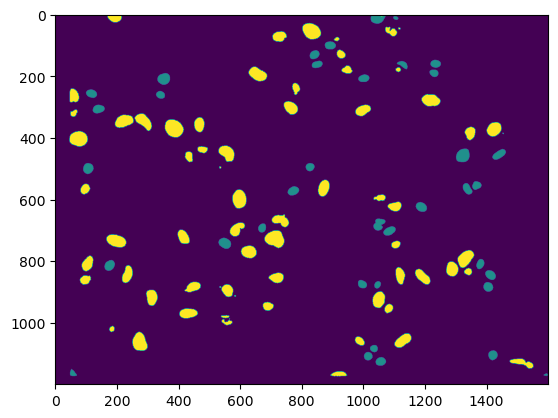

In [24]:
plt.imshow(seg[0])
plt.show()

In [58]:
i = 500

In [59]:
t, x, y = objs[i].t, objs[i].x, objs[i].y 

In [60]:
t,x,y

(12, 1092.7325439453125, 1050.163330078125)

In [29]:
seg[t,int(x),int(y)]

1

In [51]:
from skimage.measure import label, regionprops

In [61]:
labelled = label(seg[t])

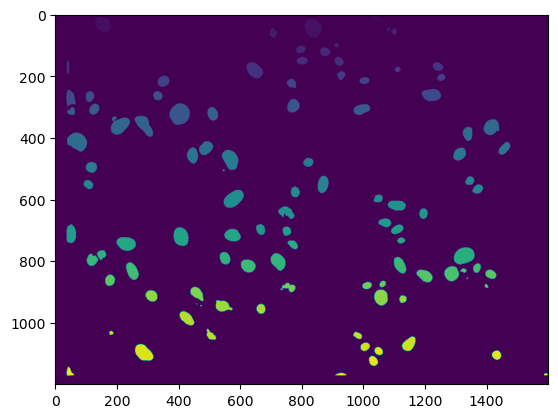

In [62]:
plt.imshow(labelled)
plt.show()

In [63]:
labelled[int(x),int(y)]

103

In [64]:
segment = labelled == 103

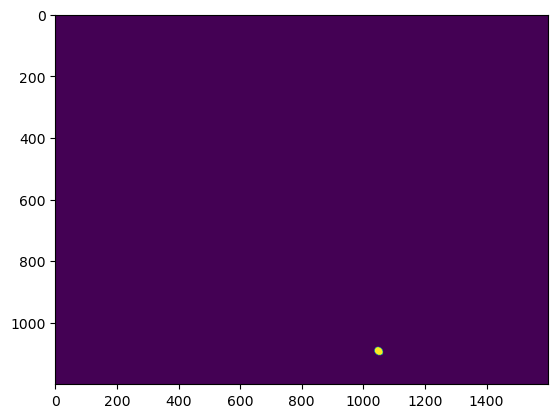

In [66]:
plt.imshow(segment)
plt.show()

In [69]:
props = regionprops(segment.astype(int))

In [74]:
len(props)

1

In [ ]:
props[0]['area']

In [78]:
props[0]['eccentricity']

0.574884103861362

In [50]:
len(prop)

2

In [ ]:
properties['area'].append(props[0]['area'])
properties['eccentricity'].append(props[0]['eccentricity'])

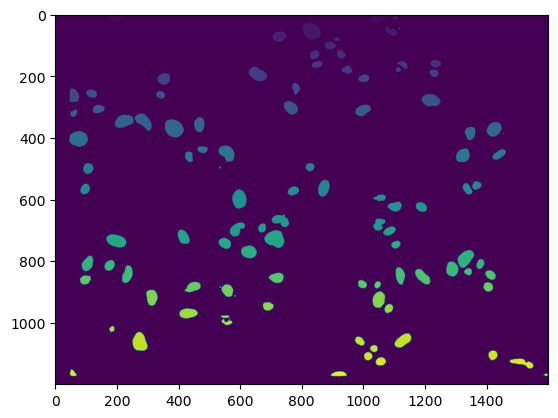

In [38]:
plt.imshow(label)
plt.show()

In [39]:
label[int(x),int(y)]

1

In [79]:
objs

[{'ID': 0, 'x': 1.0, 'y': 52.375, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 3, 'prob': 0.0},
 {'ID': 1, 'x': 14.974063873291016, 'y': 1046.0086669921875, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 0, 'prob': 0.0},
 {'ID': 2, 'x': 1.0263158082962036, 'y': 1201.1578369140625, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 3, 'prob': 0.0},
 {'ID': 3, 'x': 12.354609489440918, 'y': 1105.4893798828125, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 4, 'prob': 0.0},
 {'ID': 4, 'x': 101.42008209228516, 'y': 892.800537109375, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 0, 'prob': 0.0},
 {'ID': 5, 'x': 131.5669708251953, 'y': 841.8258666992188, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 0, 'prob': 0.0},
 {'ID': 6, 'x': 160.92105102539062, 'y': 1234.8994140625, 'z': 0.0, 't': 0, 'dummy': False, 'states': 0, 'label': 0, 'prob': 0.0},
 {'ID': 7, 'x': 163.1376495361328, 'y': 850.44775390625, 'z': 0.0, 't': 0, 'dummy': False, 'stat

In [13]:
from skimage.measure import label, regionprops
from tqdm.auto import tqdm

In [86]:
properties = {}
properties['area'] = []
properties['eccentricity'] = []
for obj in tqdm(objs):
    t, x, y = obj.t, obj.x, obj.y
    ### unique label segmentation image
    labelled = label(seg[t])
    ### get cell id from xt coord
    ID = labelled[int(x),int(y)]
    ### get unique segment image
    segment = labelled == ID
    ### get properties from unique segment
    props = regionprops(segment.astype(int))
    ### write properties to dict
    properties['area'].append(props[0]['area'])
    properties['eccentricity'].append(props[0]['eccentricity'])

  0%|          | 0/201806 [00:00<?, ?it/s]

In [87]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5', 'w', obj_type='obj_type_1',
) as hdf:
    hdf.write_segmentation(seg)
    hdf.write_objects(objs)
    hdf.write_properties(properties)

[INFO][2022/02/24 06:03:36 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5...
[INFO][2022/02/24 06:04:03 PM] Writing objects/obj_type_1
[INFO][2022/02/24 06:04:03 PM] Writing labels/obj_type_1
[INFO][2022/02/24 06:04:03 PM] Loading objects/obj_type_1 (201806, 5) (201806 filtered: None)
[INFO][2022/02/24 06:04:05 PM] Loading objects/obj_type_1 (201806, 5) (201806 filtered: None)
[INFO][2022/02/24 06:04:07 PM] Writing properties/obj_type_1/area (201806,)
[INFO][2022/02/24 06:04:07 PM] Writing properties/obj_type_1/eccentricity (201806,)
[INFO][2022/02/24 06:04:07 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5


In [88]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5', 'r', obj_type='obj_type_1',
) as hdf:
    objs = hdf.objects

[INFO][2022/02/25 08:42:54 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5...
[INFO][2022/02/25 08:42:55 AM] Loading objects/obj_type_1 (201806, 5) (201806 filtered: None)
[INFO][2022/02/25 08:42:58 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos17/Pos17_aligned/HDF/segmented_test.hdf5


In [90]:
objs[500]

,ID,x,y,z,t,dummy,states,label,prob,area,eccentricity
0,500,1092.732544,1050.16333,0.0,12,False,0,0,0.0,557.0,0.574884


In [91]:
## get file list 

In [15]:
root_dir = '/home/nathan/data/kraken/scr/h2b/giulia'
expt_list =  [expt for expt in os.listdir(f'{root_dir}') 
                   if 'GV' in expt]   
for expt in expt_list:
    pos_list = [pos for pos in os.listdir(f'{root_dir}/{expt}') 
                   if 'Pos' in pos 
                   and os.path.isdir(f'{root_dir}/{expt}/{pos}')]


In [12]:
from natsort import natsorted

In [138]:
file_list = glob.glob(f'{root_dir}/{expt}/{pos}/{pos}_aligned/HDF/segmented.hdf5')
if file_list == []:
    file_list = glob.glob(f'{root_dir}/{expt}/{pos}/HDF/segmented.hdf5')

In [139]:
file_list

['/home/nathan/data/kraken/scr/h2b/giulia/GV0792/Pos0/HDF/segmented.hdf5']

In [1]:
import numpy as np


In [1]:
for expt in tqdm(natsorted(expt_list)):
    pos_list = [pos for pos in os.listdir(f'{root_dir}/{expt}') 
                   if 'Pos' in pos 
                   and os.path.isdir(f'{root_dir}/{expt}/{pos}')]
    for pos in tqdm(natsorted(pos_list)):
        for obj_type in tqdm(['obj_type_1', 'obj_type_2']):
            
            ### check to see if already exists
            file_list = glob.glob(f'{root_dir}/{expt}/{pos}/{pos}_aligned/HDF/segmented_props.hdf5')
            if file_list == []:
                file_list = glob.glob(f'{root_dir}/{expt}/{pos}/HDF/segmented_props.hdf5')
            if file_list == []:
                print(f'Couldnt find {expt}/{pos}/{obj_type} property file, attempting relocalisation')
                
                ### find file 
                file_list = glob.glob(f'{root_dir}/{expt}/{pos}/{pos}_aligned/HDF/segmented.hdf5')
                if file_list == []:
                    file_list = glob.glob(f'{root_dir}/{expt}/{pos}/HDF/segmented.hdf5')
                if file_list == []:
                    print(f'Couldnt find {expt}/{pos}/{obj_type}, skipping')
                    continue

                print(f'Starting {expt}/{pos}/{obj_type}')
                with btrack.dataio.HDF5FileHandler(
                         file_list[0], 'r', obj_type=obj_type,
                    ) as hdf:
                        objs = hdf.objects
                        seg = hdf.segmentation

                try:
                    properties = {}
                    properties['area'] = []
                    properties['eccentricity'] = []
                    for obj in tqdm(objs):
                        t, x, y = obj.t, obj.x, obj.y
                        ### unique label segmentation image
                        labelled = label(seg[t])
                        ### get cell id from xt coord
                        ID = labelled[int(x),int(y)]
                        ### get unique segment image
                        segment = labelled == ID
                        ### get properties from unique segment
                        props = regionprops(segment.astype(int))
                        ### write properties to dict
                        properties['area'].append(props[0]['area'])
                        properties['eccentricity'].append(props[0]['eccentricity'])

                    with btrack.dataio.HDF5FileHandler(
                         file_list[0].replace('segmented.hdf5', 'segmented_props.hdf5'), 'w', obj_type=obj_type,
                    ) as hdf:
                        hdf.write_segmentation(seg)
                        hdf.write_objects(objs)
                        hdf.write_properties(properties)
                except Exception as e:
                    print(e, f'{expt}/{pos}/{obj_type}')
            else:
                print(file_list, 'props tracking file found')

NameError: name 'tqdm' is not defined

# need to retrack all and pull properties from tracking seg file